<h1 style="color:DarkBlue;">Prediction of customer attrition on a telecom comapny using boosting</h1><h4 style="color:Navy;">presented by  Mrinmoyee Mondal</h1>


Customer attrition, also known as customer churn, is the loss of clients or customers. Telecom companies, Internet providers, pay-TV companies, and insurance companies often use customer churn analysis and customer churn rates as one of their key business metrics because the cost of retaining an existing customer is far less than getting a new one.

Attrition prediction models predict customer attrition by assessing their tendency to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most incline to churn.

In this project, I have explored the dataset of a telecom company and tried to predict the customer attrition.

In [107]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


### Load the dataset

- Load the train data 

In [108]:
Train = pd.read_csv('train.csv')
Train.head(4)

,Id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1370,7596-IIWYC,Female,0,No,No,27,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.25,538.2,No
1,5676,9103-CXVOK,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.75,19.75,No
2,5800,7129-CAKJW,Female,0,No,No,17,Yes,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
3,1645,9490-DFPMD,Female,1,No,No,42,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes


In [109]:
print(Train.shape)
print(Train.info())
print(Train.describe())

(5634, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                5634 non-null   int64  
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null

In [110]:
Test = pd.read_csv('test.csv')
print(Test.shape)
print(Test.info())

(1409, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1409 non-null   int64  
 1   customerID        1409 non-null   object 
 2   gender            1409 non-null   object 
 3   SeniorCitizen     1409 non-null   int64  
 4   Partner           1409 non-null   object 
 5   Dependents        1409 non-null   object 
 6   tenure            1409 non-null   int64  
 7   PhoneService      1409 non-null   object 
 8   MultipleLines     1409 non-null   object 
 9   InternetService   1409 non-null   object 
 10  OnlineSecurity    1409 non-null   object 
 11  OnlineBackup      1409 non-null   object 
 12  DeviceProtection  1409 non-null   object 
 13  TechSupport       1409 non-null   object 
 14  StreamingTV       1409 non-null   object 
 15  StreamingMovies   1409 non-null   object 
 16  Contract          1409 non-null

In [111]:
train=Train.drop(['customerID'],1)
test=Test.drop(['customerID'],1)

train["TotalCharges"] = pd.to_numeric(train["TotalCharges"], errors='coerce')
test["TotalCharges"] = pd.to_numeric(test["TotalCharges"], errors='coerce')

# encode target variable as integer
train.loc[train['Churn']=='Yes', 'Churn'] = 1
train.loc[train['Churn']=='No', 'Churn'] = 0


In [112]:
print(train['TotalCharges'].isnull().sum())
print(test['TotalCharges'].isnull().sum())

9
2


<AxesSubplot:ylabel='Frequency'>

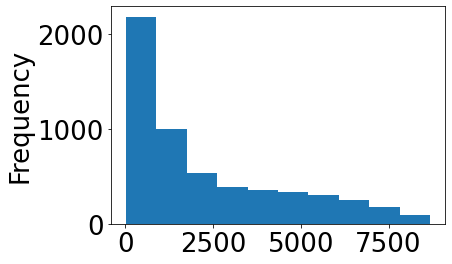

In [113]:
train.TotalCharges.plot(kind='hist')

In [114]:
Train.iloc[[827]]

,Id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
827,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.9,,No


In [115]:
Train.iloc[[951]]

,Id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
951,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.0,,No


- If we revisit Row: 827 row: 951 from Train set, we will see that column 'TotalCharges' does not have a value. So when we converting the value from object to bool it is giving NaN value

In [116]:
train['TotalCharges'].fillna(train['TotalCharges'].median(), inplace=True)
test['TotalCharges'].fillna(test['TotalCharges'].median(), inplace=True)

### Visualize the data

- Replace the missing values and modify some column values(as required by you).
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

In [117]:
# Code starts here
categorical_columns = list(c for c in train.columns 
                       if train[c].dtype.name == 'object')
numerical_columns = list(c for c in train.columns 
                     if train[c].dtype.name != 'object')

print('\ncategorical_columns:', categorical_columns)
print('\n\nnumerical_columns:', numerical_columns)


categorical_columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


numerical_columns: ['Id', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


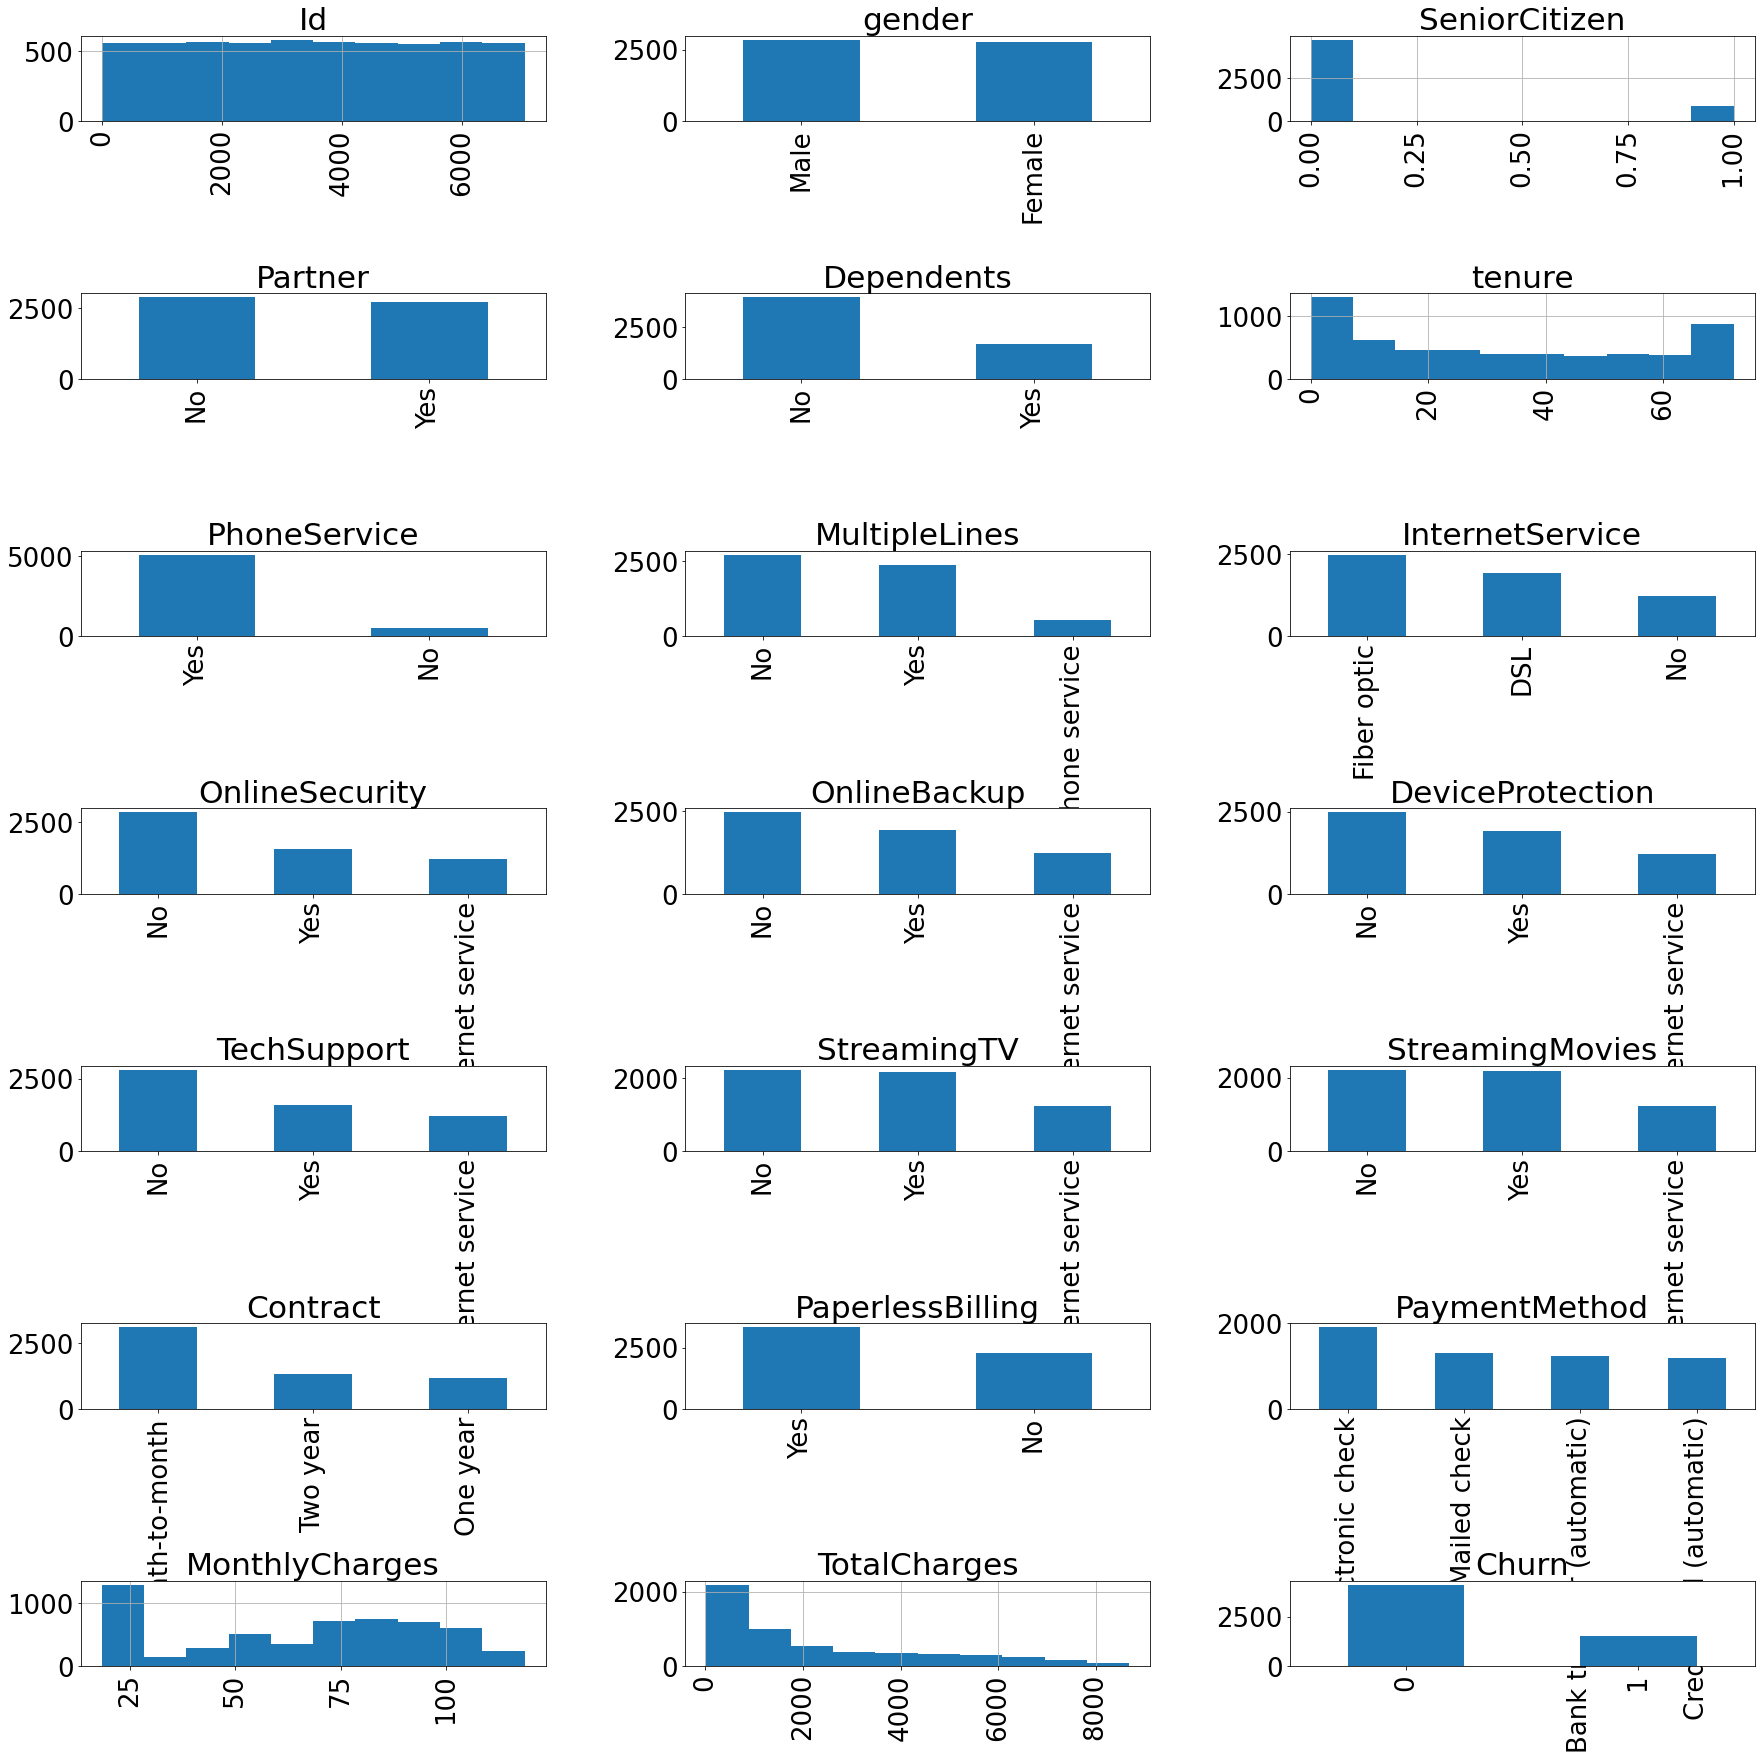

In [118]:
fig = plt.figure(figsize=(30,30))

cols = 3
rows = np.ceil(float(train.shape[1]) / cols)

for i, column in enumerate(train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    plt.rcParams['font.size'] = '26'
    if train.dtypes[column] == np.object:
        train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=2, wspace=0.3)


In [119]:
le = LabelEncoder()

for i in categorical_columns:
    train[i] = le.fit_transform(train[i])
    if i in [c for c in test.columns 
                       if test[c].dtype.name == 'object']:
        test[i] = le.transform(test[i])

### Model building

- Try to predict the churning of customers using AdaBoost
- Try and implement XGBoost for our customer churn problem and see how it performs in comparision to AdaBoost. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [144]:
X = train.iloc[:, 1:-1]
y = train.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size = 0.3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(3943, 19) (1691, 19) (3943,) (1691,)


In [151]:
dt_clf = DecisionTreeClassifier(max_depth=5 ,random_state=17)
dt_clf.fit(X_train,y_train)
dt_clf_predictions = dt_clf.predict(X_val) 
print("Decision tree accuracy: ",accuracy_score(y_val,dt_clf_predictions))

Decision tree accuracy:  0.7853341218214075


In [171]:
ada_boost_clf = AdaBoostClassifier(base_estimator=dt_clf,random_state=0,n_estimators=200, 
                             learning_rate=0.01)
ada_boost_clf.fit(X_train,y_train)
ada_boost_pred= ada_boost_clf.predict(X_val) 
print("AdaBoost accuracy: ",accuracy_score(y_val,ada_boost_pred))

AdaBoost accuracy:  0.804849201655825


In [169]:
xg_boost_clf = XGBClassifier(base_estimator=dt_clf,random_state=0, eval_metric="logloss",n_estimators=200, learning_rate=0.03)
xg_boost_clf.fit(X_train,y_train)
xg_boost_pred = xg_boost_clf.predict(X_val) 
print("xgBoost accuracy: ",accuracy_score(y_val,xg_boost_pred))

[10:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


xgBoost accuracy:  0.804849201655825


In [172]:
test

,Id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4539,1,0,1,1,67,1,2,0,2,0,2,0,2,2,2,1,2,79.70,5293.40
1,1802,1,0,1,1,7,0,1,0,2,2,2,0,0,0,2,0,3,38.55,280.00
2,1380,1,0,1,1,61,1,0,1,0,2,0,2,2,2,1,1,0,98.45,6145.20
3,5305,0,0,1,0,43,1,0,0,2,0,2,2,2,2,2,1,2,78.80,3460.30
4,1960,0,0,1,1,33,1,2,1,0,2,2,2,0,0,0,0,1,88.60,2888.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1416,0,0,1,1,58,0,1,0,0,0,2,2,2,2,2,1,1,55.50,3166.90
1405,2115,0,0,0,0,71,1,2,1,2,2,2,2,2,2,2,1,2,118.65,8477.60
1406,1078,0,1,0,0,59,1,2,1,0,2,0,0,0,0,2,1,1,79.20,4590.35
1407,756,1,0,0,0,66,1,0,2,1,1,1,1,1,1,2,0,0,19.70,1253.80


In [173]:
test1=test.iloc[:, 1:]
test1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,67,1,2,0,2,0,2,0,2,2,2,1,2,79.70,5293.40
1,1,0,1,1,7,0,1,0,2,2,2,0,0,0,2,0,3,38.55,280.00
2,1,0,1,1,61,1,0,1,0,2,0,2,2,2,1,1,0,98.45,6145.20
3,0,0,1,0,43,1,0,0,2,0,2,2,2,2,2,1,2,78.80,3460.30
4,0,0,1,1,33,1,2,1,0,2,2,2,0,0,0,0,1,88.60,2888.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,0,1,1,58,0,1,0,0,0,2,2,2,2,2,1,1,55.50,3166.90
1405,0,0,0,0,71,1,2,1,2,2,2,2,2,2,2,1,2,118.65,8477.60
1406,0,1,0,0,59,1,2,1,0,2,0,0,0,0,2,1,1,79.20,4590.35
1407,1,0,0,0,66,1,0,2,1,1,1,1,1,1,2,0,0,19.70,1253.80


In [174]:
# Code ends here

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [175]:
# Code Starts here
id_ = test['Id']
y_pred_test = xg_boost_clf.predict(test1)

In [176]:

# Create a sample submission file
final_submission = pd.DataFrame({'Id':id_,'Churn':y_pred_test})

final_submission.loc[final_submission['Churn']==1, 'Churn'] = 'Yes'
final_submission.loc[final_submission['Churn']==0, 'Churn'] = 'No'

# Convert the sample submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)

# Code ends here